# Inspirational piece

http://farm8.staticflickr.com/7046/8690129489_f571afd745_o.png

My goal: to do the same kind of "small multiples", not about players, but about different runner categories at the “Course de l'Escalade" -- a popular marathon in Geneva.

The race has many different categories which makes it difficult to understand for people of the outside.

* two polished charts
* a diary:
* * 6 questions
* * 3 headlines

(Think about annotation)

# Diary

The first idea was to plot all categories at the same time. It's more difficult than I thought because there's too many of these categories: 36 categories!



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

Fichiers:
* inscriptions
* résultats

In [2]:
def to_xlsx(filename):
    return "data/{}.xlsx".format(filename)
def to_xls(filename):
    return "data/{}.xls".format(filename)

In [3]:
%time xl = pd.ExcelFile(to_xlsx('2015_resultats'))
xl.sheet_names

CPU times: user 12.7 s, sys: 97.5 ms, total: 12.8 s
Wall time: 12.8 s


['Sheet3', 'Data', 'Catégories', 'Enfants jeunes adultes']

In [4]:
df = xl.parse('Data', skiprows=3)
df.head()

,doss,nom prénom,rue1,rue2,pays,npo,lieu,Sex,an,CatNo,CatCode,temps course,RangCat,vitesse,moyenne,temps_net,Catégorie,Enfants / Jeunes / adultes,"Catégories d'age (Elite, Walking)",Age
0,1,Kipyatich Abraham,D-Schönbeck,NaN,D,61137,Schöneck,M,1993,11,Elite-M,"20.56,3",1.,"20,984","2.51,5","20.51,3",Escaladélite hommes,Adultes,Hommes I,21
1,2,Abraham Tadesse,Rue Baulacre 22,NaN,CH,1202,Genève,M,1982,11,Elite-M,"21.01,5",2.,"20,897","2.52,2","20.57,9",Escaladélite hommes,Adultes,Hommes II,32
2,3,Ereng Patrick,Taunusstrasse 20,c/o Alexander Hempel,D,61137,Schöneck,M,1987,11,Elite-M,"22.03,1",14.,"19,925","3.00,6","21.59,2",Escaladélite hommes,Adultes,Hommes I,27
3,4,Nizigiyimana Ezechiel,NaN,NaN,F,69100,Villeurbanne,M,1988,11,Elite-M,"21.47,6",7.,"20,161","2.58,5","21.43,6",Escaladélite hommes,Adultes,Hommes I,26
4,7,Huwiler Thomas,ch Isaac-Anken 13,NaN,CH,1219,Aïre,M,1989,11,Elite-M,"22.37,8",26.,"19,415","3.05,4","22.34,1",Escaladélite hommes,Adultes,Hommes I,25


In [5]:
df.columns
#df[['vitesse']]

Index(['doss', 'nom prénom', 'rue1', 'rue2', 'pays', 'npo', 'lieu', 'Sex',
       'an', 'CatNo', 'CatCode', 'temps course', 'RangCat', 'vitesse',
       'moyenne', 'temps_net', 'Catégorie', 'Enfants / Jeunes / adultes',
       'Catégories d'age (Elite, Walking)', 'Age'],
      dtype='object')

In [6]:
def to_float(value):
    try:
        return float(str.replace(value, ',', '.'))
    except:
        return None
df['vitesse f'] = df['vitesse'].apply(to_float)

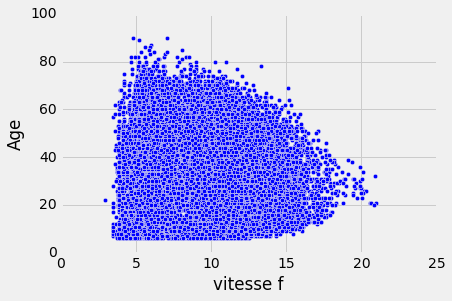

In [7]:
plt.style.use('fivethirtyeight')
ax = df.plot(kind='scatter', x='vitesse f', y='Age')
#ax.set_xlim([300, 460])
#ax.set_ylim([300, 460])

In [21]:
category = 'Catégorie'
categories = df[category].unique().tolist()
categories = ['Escaladélite hommes', 'Escaladélite femmes', 'Hommes I', 'Femmes I', 'Hommes II','Femmes II', 'Hommes III', 'Femmes III']
len(categories)
#print(*categories, sep="','")

8

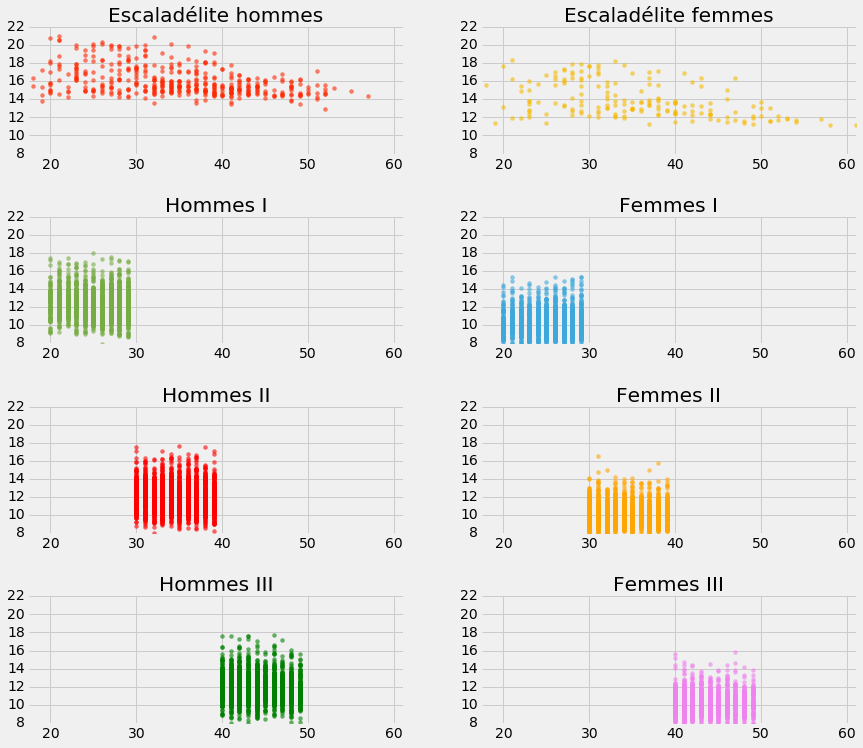

In [26]:
x_col = 'vitesse f'
y_col = 'Age'
nrows = 4; ncols = 2
num_plots = nrows * ncols  # number of subplots

fig = plt.figure(figsize=(12, 10))

axes = [plt.subplot(nrows,ncols,i) for i in range(1,num_plots+1)]

plt.tight_layout(pad=0, w_pad=3, h_pad=1)
plt.subplots_adjust(hspace=.5)

colors = ['#FF2700', '#F6B900', '#77AB43', '#3EA8DC', 'red', 'orange', 'green', 'violet']

count = 0

for i in range(num_plots):
    ax = axes[i]
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    dfx = df[df[category]==categories[i]]#.head(5)
    
#   BAR CHARTS
    x = dfx[x_col]
    y = dfx[y_col]
    ax.set_title(categories[i])
    #ax.plot(dfx['Age'], dfx['vitesse f'], linestyle='', marker='o')
    ax.scatter(dfx['Age'], dfx['vitesse f'], color=colors[count], cmap='gray', linewidth=0, alpha=0.6)

    ax.set_xlim([17.5, 61])
    ax.set_ylim([8, 22])
    
    count += 1
plt.savefig('output.pdf')

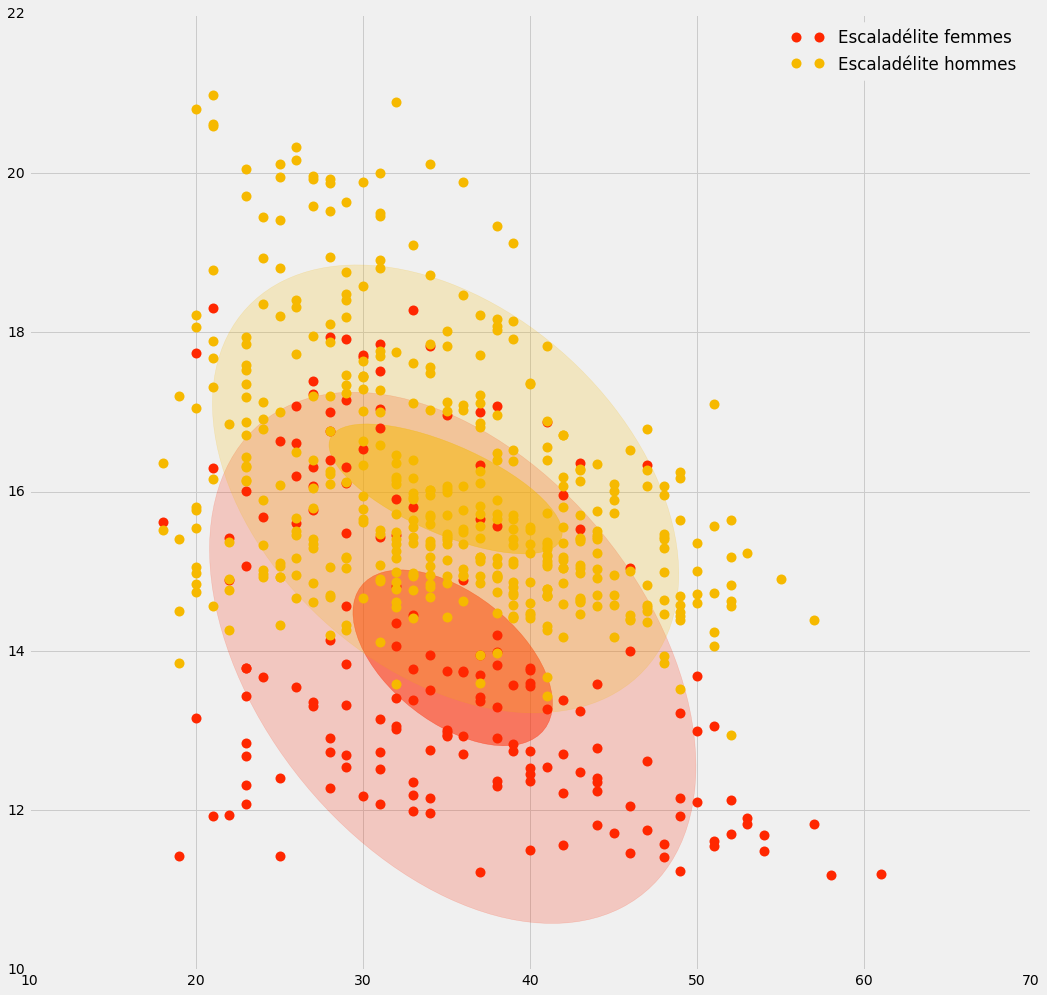

In [10]:
cat_elite = ['Escaladélite hommes', 'Escaladélite femmes']

x_col = 'Age'
y_col = 'vitesse f'

from matplotlib.patches import Ellipse

def draw_ellipse(_width, _height, _angle, _alpha):
    return Ellipse((np.mean(x), np.mean(y)),
    width=_width, height=_height,
    angle=_angle,
    facecolor = colors[count],
    edgecolor = colors[count],
                  alpha=_alpha)    


colors = ['#FF2700', '#F6B900', '#77AB43', '#3EA8DC']
darkColors = ['#AC1C08', '#CA9105', '#487A08', '#076083']

colors.extend(colors)
darkColors.extend(darkColors)
colors.extend(colors)
darkColors.extend(darkColors)
colors.extend(colors)
darkColors.extend(darkColors)
colors.extend(colors)
darkColors.extend(darkColors)


df = df[df['vitesse f'] == df['vitesse f']]

fig, ax = plt.subplots(figsize=(16,16))
count = 0
for category, group in df.groupby('Catégorie'):
    if category not in cat_elite:
        continue
    ax.plot(group[x_col], group[y_col], marker='o', linestyle='', color=colors[count], label=category, markersize=10, markeredgewidth=0)
#    ax.plot(group[x_col].mean(), group[y_col].mean(), marker='o', color=darkColors[count], linestyle='solid', markersize=16, label=category, markeredgewidth=0)
    
    x = group[x_col]
    y = group[y_col]
    
    # 1 - q 0.95
    width = group[x_col].quantile(q=0.05) - group[x_col].quantile(q=0.95)
    height = group[y_col].quantile(q=0.05) - group[y_col].quantile(q=0.95)
    cov = np.cov(x, y) # Ref: Estimate a covariance matrix, given data and weights.
    lambda_, v = np.linalg.eig(cov) # Ref: Compute the eigenvalues and right eigenvectors of a square array.
    angle=np.rad2deg(-np.arccos(v[0, 0]))
    #print("width={}, height={}, angle={}".format(width, height, angle))
    ell = draw_ellipse(width, height, angle, 0.2)
    ax.add_artist(ell)
    
    # 2 - q 0.5
    width = group[x_col].quantile(q=0.5) - group[x_col].quantile(q=0.05)
    height = group[y_col].quantile(q=0.5) - group[y_col].quantile(q=0.05) 
    cov = np.cov(x, y) # Ref: Estimate a covariance matrix, given data and weights.
    lambda_, v = np.linalg.eig(cov) # Ref: Compute the eigenvalues and right eigenvectors of a square array.
    angle=np.rad2deg(-np.arccos(v[0, 0]))
    # print("width={}, height={}, angle={}".format(width, height, angle))
    ell = draw_ellipse(width, height, angle, 0.5)
    ax.add_artist(ell)
    
    count += 1

ax.legend(loc='upper right')


#ax.set_xlim([305, 455])
#ax.set_ylim([305, 455])
plt.savefig('Escalade.pdf', transparent=True, bbox_inches='tight')